Remaining Nulls after Imputation:
id                            0
member_id                     0
loan_amount                   0
funded_amount                 0
funded_amount_inv             0
term                          0
int_rate                      0
instalment                    0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_date                    0
loan_status                   0
payment_plan                  0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_credit_line          0
inq_last_6mths                0
open_accounts                 0
total_accounts                0
out_prncp                     0
out_prncp_inv                 0
total_payment                 0
total_payment_inv             0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recove

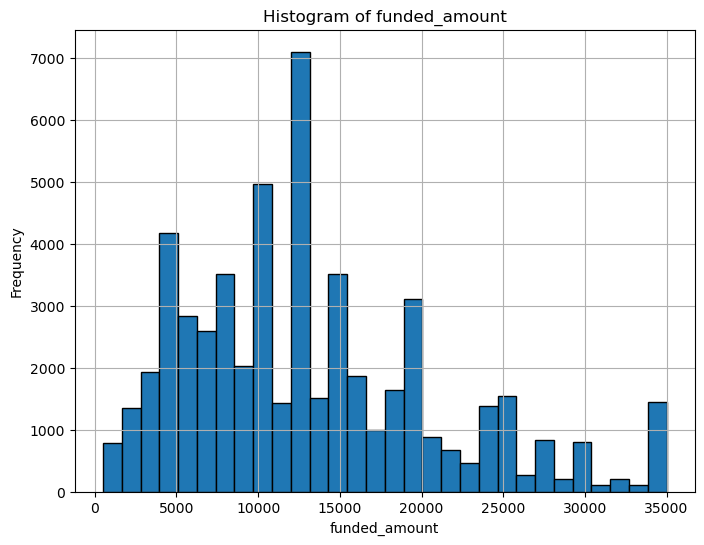

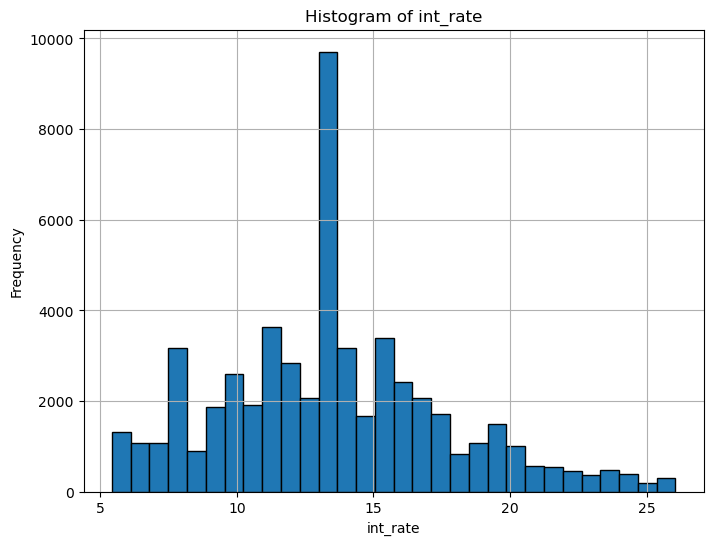

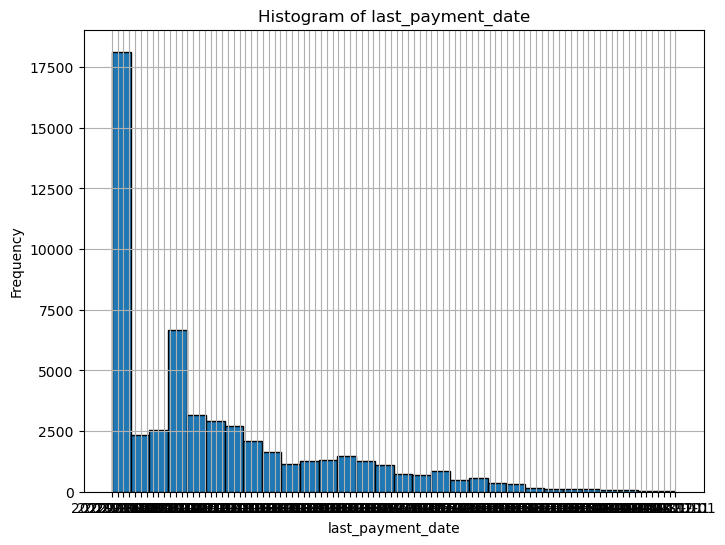

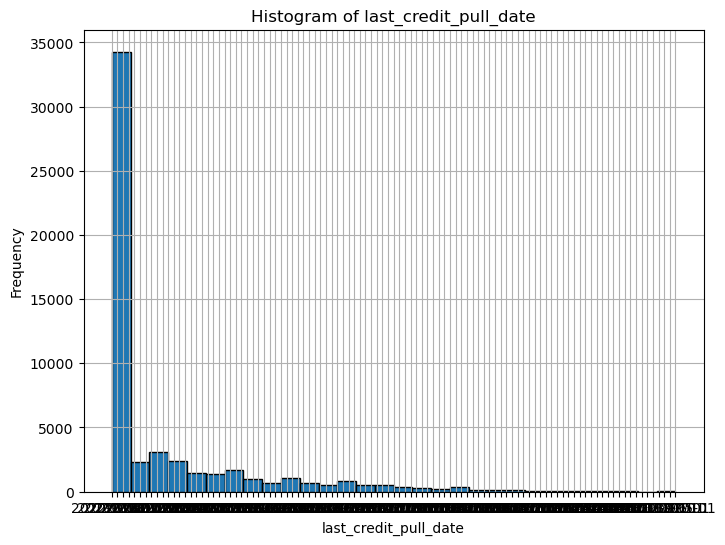

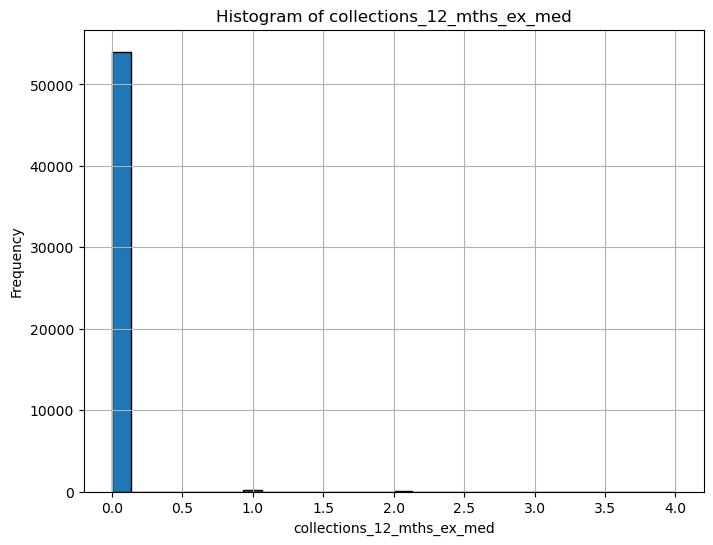

Imputed data saved to: C:/Users/admin/EDA - Customer Loans/imputed_data.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

class Plotter:
    @staticmethod
    def plot_histograms(dataframe, columns):
        for col in columns:
            plt.figure(figsize=(8, 6))
            dataframe[col].hist(bins=30, edgecolor='black')
            plt.title(f'Histogram of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

class DataFrameTransform:
    @staticmethod
    def check_nulls(dataframe):
        return dataframe.isnull().sum()

    @staticmethod
    def drop_columns(dataframe, columns):
        return dataframe.drop(columns=columns, inplace=True)

    @staticmethod
    def impute_nulls(dataframe, column, method='mean'):
        if method == 'mean':
            dataframe[column].fillna(dataframe[column].mean(), inplace=True)
        elif method == 'median':
            dataframe[column].fillna(dataframe[column].median(), inplace=True)
        elif method == 'mode':
            mode_val = dataframe[column].mode().iloc[0]
            dataframe[column].fillna(mode_val, inplace=True)
        else:
            raise ValueError("Invalid imputation method. Choose 'mean', 'median', or 'mode'.")

data = pd.read_csv('C:/Users/admin/EDA - Customer Loans/transformed_data.csv')

# Create instances of Plotter and DataFrameTransform
plotter = Plotter()
transformer = DataFrameTransform()

# Drop specified columns
columns_to_drop = ['employment_length', 'mths_since_last_delinq', 'mths_since_last_record',
                   'mths_since_last_major_derog', 'next_payment_date']
transformer.drop_columns(data, columns_to_drop)

# Impute missing values
columns_to_impute = ['funded_amount', 'term', 'int_rate', 'last_payment_date', 'last_credit_pull_date',
                     'collections_12_mths_ex_med']

for col in columns_to_impute:
    if data[col].dtype in ['int64', 'float64']:
        # Perform normality test only for numeric columns
        imputation_method = 'mean' if stats.normaltest(data[col].dropna()).pvalue > 0.05 else 'median'
        transformer.impute_nulls(data, col, method=imputation_method)
    else:
        # For non-numeric columns, impute with mode
        transformer.impute_nulls(data, col, method='mode')

# Check for remaining nulls
remaining_nulls = transformer.check_nulls(data)
print("Remaining Nulls after Imputation:")
print(remaining_nulls)

# Plot histograms
columns_to_plot = ['funded_amount', 'int_rate', 'last_payment_date', 'last_credit_pull_date',
                   'collections_12_mths_ex_med']
plotter.plot_histograms(data, columns_to_plot)

imputed_data_path = 'C:/Users/admin/EDA - Customer Loans/imputed_data.csv'
data.to_csv(imputed_data_path, index=False)
print(f"Imputed data saved to: {imputed_data_path}")